In [ ]:
!pip list | grep scikit-learn

scikit-learn                  0.24.2


In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
!pip list | grep scikit-learn

scikit-learn                  0.24.2


In [ ]:
#IMPORTAR LIBRERÍA
import pandas as pd                                     # LIBRERÍA PARA DATAFRAMES
import numpy as np                                      # LIBRERÍA PARA MATRICES
import os                                               # LIBRERÍA PARA OPERACIONES CON EL SISTEMA OPERATIVO
import matplotlib.pyplot as plt                         # LIBRERÍA PARA GRÁFICAS 2D
from sklearn import model_selection                     # LIBRERÍA PARA SEPARAR DATA EN ENTRENAMIENTO Y VALIDACIÓN
from sklearn.tree import DecisionTreeRegressor          # LIBRERÍA PARA IMPLEMENTAR REGRESIÓN POR ARBOL DE DECISIÓN
from sklearn.tree import export_graphviz                # LIBRERÍA PARA EXPORTAR ÁRBOL DE DECISIÓN (ARCHIVO DOT)
from graphviz import Source                             # LIBRERÍA PARA MOSTRAR ÁRBOL DE DECISIÓN (ARCHIVO DOT)
from sklearn.model_selection import KFold               # LIBRERÍA PARA DIVIDIR LA DATA EN N-FOLD O SUBCONJUNTOS DE TESTING DIFERENTES
from sklearn.model_selection import cross_val_score     # LIBRERÍA PARA OBTENER LA CORRELACIÓN POR VALIDACIÓN CRUZADA
from sklearn.metrics import mean_squared_error          # LIBRERÍA PARA HALLAR EL ERROR CUADRÁTICO MEDIO
from joblib import load
from sklearn.preprocessing import PolynomialFeatures    # LIBRERÍA PARA LINEALIZAR POLINOMIOS
from sklearn.svm import SVR                             # LIBRERÍA PARA IMPLEMENTAR LA REGRESIÓN POR SUPPORT VECTOR MACHINE

from google.colab import drive          # LIBRERÍA PARA IMPORTAR DESDE GOOGLE DRIVE

In [ ]:
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#LEER ARCHIVO EXCEL (.xlsx)
mainpath = "drive/My Drive/DATASET"
filenameDatos = "PP_CONTROL_MOTOR_DC/Dataset_Motor.xlsx"
fullpathDatos = os.path.join(mainpath,filenameDatos)

data = pd.read_excel(fullpathDatos)

#Mostrar Datos
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1995,0.117811,2.026651,27828.389339
1996,0.117859,1.415655,13640.427254
1997,0.117906,2.026651,27850.673436
1998,0.117953,2.026651,27861.815484


In [ ]:
data = data[data["Inercia_Total"] <= 0.08]
data

,Inercia_Total,Ganancia_Corriente,Ganancia_Velocidad
0,0.023718,0.107391,17.512910
1,0.023765,0.107391,17.549938
2,0.023812,0.107391,17.586966
3,0.023859,0.107391,17.623995
4,0.023907,0.107391,17.661023
...,...,...,...
1189,0.079797,0.229605,259.688392
1190,0.079844,0.229605,259.842612
1191,0.079891,0.229605,259.996832
1192,0.079938,0.229605,260.151053


In [ ]:
#OBTENER LA VARIABLE CARACTERÍSTICA Y LA VARIABLE OBJETIVO DEL DATASET
caracteristica = ["Inercia_Total"]
objetivo = ["Ganancia_Velocidad"]

X = data[caracteristica]
Y = data[objetivo]

In [ ]:
#OBTENEMOS DATOS DE ENTRENAMIENTO Y VALIDACIÓN (75% DE DATOS PARA EL CONJUNTO DE ENTRENAMIENTO)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = 0.25, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearRegression from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


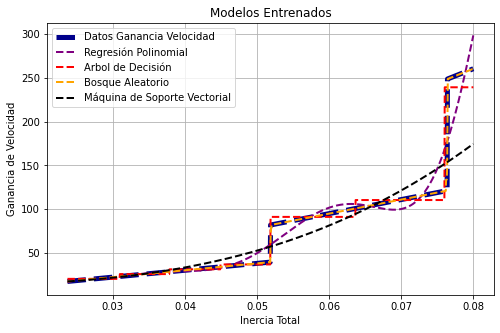

In [ ]:
modelo1 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_Lineal_Velocidad.pkl")
modelo2 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_Arbol_Velocidad.pkl")
modelo3 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_Bosque_Velocidad.pkl")
modelo4 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_SVM_Velocidad.pkl")

mP1 = load(modelo1)
mP2 = load(modelo2)
mP3 = load(modelo3)
mP4 = load(modelo4)
polyV = PolynomialFeatures(degree = 8)

Y_pred1 = mP1.predict(polyV.fit_transform(X))
Y_pred2 = mP2.predict(X)
Y_pred3 = mP3.predict(X)
Y_pred4 = mP4.predict(X)

#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(data.Inercia_Total, data.Ganancia_Velocidad, c = "darkblue",label = "Datos Ganancia Velocidad", linewidth = 5, linestyle='--')
plt.plot(X, Y_pred1, c = "purple", label = "Regresión Polinomial", linewidth = 2, linestyle='--')
plt.plot(X, Y_pred2, c = "red", label = "Arbol de Decisión", linewidth = 2, linestyle='--')
plt.plot(X, Y_pred3, c = "orange", label = "Bosque Aleatorio", linewidth = 2, linestyle='--')
plt.plot(X, Y_pred4, c = "black", label = "Máquina de Soporte Vectorial", linewidth = 2, linestyle='--')
plt.title("Modelos Entrenados")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Velocidad")
plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearRegression from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.2.post1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


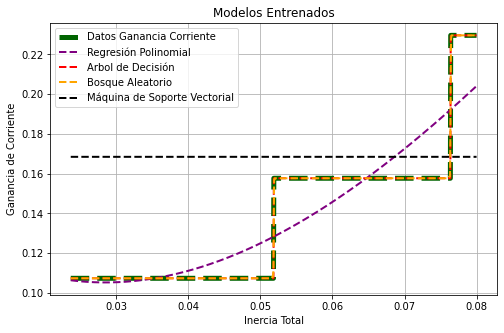

In [ ]:
modelo1 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_Lineal_Corriente.pkl")
modelo2 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_Arbol_Corriente.pkl")
modelo3 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_Bosque_Corriente.pkl")
modelo4 = os.path.join(mainpath,"PP_CONTROL_MOTOR_DC/Motor_Regresion_SVM_Corriente.pkl")

mP1 = load(modelo1)
mP2 = load(modelo2)
mP3 = load(modelo3)
mP4 = load(modelo4)
polyV = PolynomialFeatures(degree = 3)

Y_pred1 = mP1.predict(polyV.fit_transform(X))
Y_pred2 = mP2.predict(X)
Y_pred3 = mP3.predict(X)
Y_pred4 = mP4.predict(X)

#GRÁFICA DEL MODELO
plt.figure(figsize = (8,5))
plt.plot(data.Inercia_Total, data.Ganancia_Corriente, c = "darkgreen", label = "Datos Ganancia Corriente", linewidth = 5, linestyle='--')
plt.plot(X, Y_pred1, c = "purple", label = "Regresión Polinomial", linewidth = 2, linestyle='--')
plt.plot(X, Y_pred2, c = "red", label = "Arbol de Decisión", linewidth = 2, linestyle='--')
plt.plot(X, Y_pred3, c = "orange", label = "Bosque Aleatorio", linewidth = 2, linestyle='--')
plt.plot(X, Y_pred4, c = "black", label = "Máquina de Soporte Vectorial", linewidth = 2, linestyle='--')
plt.title("Modelos Entrenados")
plt.xlabel("Inercia Total")
plt.ylabel("Ganancia de Corriente")
plt.grid()
plt.legend()
plt.show()